Test different scaling strategies.  
Straight np.preprocessing.MinMaxScaler() will break the balance with in a profile. ie segments of the same value will have different values after scaling.   
- Try global scaling
- Try without scaling, how to do that in Keras

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import time
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Input, Dense
from keras.models import Model
import keras

from sklearn import preprocessing
import seaborn as sns

Using TensorFlow backend.


#### Load and process data

In [3]:
pklfile = '/Users/bogao/DataFiles/new landscape/data/breast_cyto.pkl'
with open(pklfile, 'rb') as fi:
    feat_mat = pickle.load(fi)

Group DUPs and DELs

In [14]:
def groupAmpDel(x):
    amps = x[::2].copy()

    dels =x[1::2].copy()

    return np.concatenate((amps, dels))

In [15]:
featmat_t = np.apply_along_axis(groupAmpDel, 1, feat_mat)

### Different scaling methods

sklearn.preprocessing.normalize  
Does not perform well

In [24]:
featmat_nom = preprocessing.normalize(np.abs(featmat_t))

In [25]:
print([featmat_nom.min(), featmat_nom.max()])

[0.0, 0.9493021104972115]


sklearn.preprocessing.MaxAbsScaler on samples
worse than featureMinMax

In [46]:
featmat_mas = preprocessing.MaxAbsScaler().fit_transform(abs(featmat_t).T).T

In [76]:
np.sum(featmat_mas[:,3])

231.76390242812587

sklearn.preprocessing.MaxAbsScaler on features

In [79]:
featmat_maf = preprocessing.MaxAbsScaler().fit_transform(np.abs(featmat_t))

preprocessing.MinMaxScaler

In [83]:
featmat_mms = preprocessing.MinMaxScaler().fit_transform(np.abs(featmat_t))

## Global params

In [6]:
early_stopping_monitor = keras.callbacks.EarlyStopping(monitor='loss', patience=20,mode='min')
input_size = feat_mat.shape[1]
hidden_size = 800
output_size = input_size
epochs = 2000
batch_size = 128

### DAE without scaling

In [85]:
epochs = 2000
noise_factor = 0.05
feat_noisy = featmat_mms + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=feat_mat.shape) 
feat_noisy = np.clip(feat_noisy, 0., 1.)

x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder_base = Model(inputs=x, outputs=r)
autoencoder_base.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

history_base = autoencoder_base.fit(feat_noisy, feat_noisy, batch_size=batch_size,epochs=epochs, callbacks = [early_stopping_monitor],shuffle=True)

Epoch 1/2000
6250/6250 [==============================] - 3s 451us/step - loss: 0.0331 - acc: 0.0019
Epoch 2/2000
6250/6250 [==============================] - 2s 311us/step - loss: 0.0091 - acc: 0.0037
Epoch 3/2000
6250/6250 [==============================] - 2s 304us/step - loss: 0.0091 - acc: 0.0019
Epoch 4/2000
6250/6250 [==============================] - 2s 312us/step - loss: 0.0090 - acc: 0.0027
Epoch 5/2000
6250/6250 [==============================] - 2s 315us/step - loss: 0.0090 - acc: 0.0022
Epoch 6/2000
6250/6250 [==============================] - 2s 320us/step - loss: 0.0090 - acc: 0.0032
Epoch 7/2000
6250/6250 [==============================] - 2s 348us/step - loss: 0.0088 - acc: 0.0026
Epoch 8/2000
6250/6250 [==============================] - 2s 334us/step - loss: 0.0087 - acc: 0.0030
Epoch 9/2000
6250/6250 [==============================] - 2s 330us/step - loss: 0.0085 - acc: 0.0024
Epoch 10/2000
6250/6250 [==============================] - 2s 325us/step - loss: 0.0083 - a

6250/6250 [==============================] - 2s 325us/step - loss: 0.0014 - acc: 0.4339
Epoch 82/2000
6250/6250 [==============================] - 2s 327us/step - loss: 0.0014 - acc: 0.4458
Epoch 83/2000
6250/6250 [==============================] - 2s 331us/step - loss: 0.0014 - acc: 0.4472
Epoch 84/2000
6250/6250 [==============================] - 2s 334us/step - loss: 0.0014 - acc: 0.4496
Epoch 85/2000
6250/6250 [==============================] - 2s 330us/step - loss: 0.0014 - acc: 0.4517
Epoch 86/2000
6250/6250 [==============================] - 2s 322us/step - loss: 0.0014 - acc: 0.4579
Epoch 87/2000
6250/6250 [==============================] - 2s 322us/step - loss: 0.0014 - acc: 0.4619
Epoch 88/2000
6250/6250 [==============================] - 2s 326us/step - loss: 0.0014 - acc: 0.4627
Epoch 89/2000
6250/6250 [==============================] - 2s 325us/step - loss: 0.0014 - acc: 0.4661
Epoch 90/2000
6250/6250 [==============================] - 2s 322us/step - loss: 0.0014 - acc: 0

6250/6250 [==============================] - 2s 320us/step - loss: 9.5461e-04 - acc: 0.6723
Epoch 161/2000
6250/6250 [==============================] - 2s 316us/step - loss: 9.4883e-04 - acc: 0.6750
Epoch 162/2000
6250/6250 [==============================] - 2s 312us/step - loss: 9.3680e-04 - acc: 0.6738
Epoch 163/2000
6250/6250 [==============================] - 2s 321us/step - loss: 9.2350e-04 - acc: 0.6739
Epoch 164/2000
6250/6250 [==============================] - 2s 319us/step - loss: 9.1545e-04 - acc: 0.6758
Epoch 165/2000
6250/6250 [==============================] - 2s 314us/step - loss: 9.1420e-04 - acc: 0.6795
Epoch 166/2000
6250/6250 [==============================] - 2s 319us/step - loss: 9.2372e-04 - acc: 0.6730
Epoch 167/2000
6250/6250 [==============================] - 2s 322us/step - loss: 9.3048e-04 - acc: 0.6811
Epoch 168/2000
6250/6250 [==============================] - 2s 321us/step - loss: 9.1129e-04 - acc: 0.6790
Epoch 169/2000
6250/6250 [==========================

6250/6250 [==============================] - 2s 323us/step - loss: 7.5062e-04 - acc: 0.7429
Epoch 237/2000
6250/6250 [==============================] - 2s 315us/step - loss: 7.5341e-04 - acc: 0.7387
Epoch 238/2000
6250/6250 [==============================] - 2s 321us/step - loss: 7.7057e-04 - acc: 0.7328
Epoch 239/2000
6250/6250 [==============================] - 2s 325us/step - loss: 7.6209e-04 - acc: 0.7378
Epoch 240/2000
6250/6250 [==============================] - 2s 327us/step - loss: 7.4939e-04 - acc: 0.7358
Epoch 241/2000
6250/6250 [==============================] - 2s 326us/step - loss: 7.4855e-04 - acc: 0.7392
Epoch 242/2000
6250/6250 [==============================] - 2s 324us/step - loss: 7.4891e-04 - acc: 0.7390
Epoch 243/2000
6250/6250 [==============================] - 2s 323us/step - loss: 7.4438e-04 - acc: 0.7458
Epoch 244/2000
6250/6250 [==============================] - 2s 324us/step - loss: 7.4730e-04 - acc: 0.7413
Epoch 245/2000
6250/6250 [==========================

6250/6250 [==============================] - 2s 311us/step - loss: 6.6400e-04 - acc: 0.7621
Epoch 313/2000
6250/6250 [==============================] - 2s 303us/step - loss: 6.6507e-04 - acc: 0.7565
Epoch 314/2000
6250/6250 [==============================] - 2s 301us/step - loss: 6.6532e-04 - acc: 0.7637
Epoch 315/2000
6250/6250 [==============================] - 2s 312us/step - loss: 6.6369e-04 - acc: 0.7627
Epoch 316/2000
6250/6250 [==============================] - 2s 303us/step - loss: 6.6744e-04 - acc: 0.7614
Epoch 317/2000
6250/6250 [==============================] - 2s 301us/step - loss: 6.7032e-04 - acc: 0.7589
Epoch 318/2000
6250/6250 [==============================] - 2s 301us/step - loss: 6.7351e-04 - acc: 0.7523
Epoch 319/2000
6250/6250 [==============================] - 2s 301us/step - loss: 6.8315e-04 - acc: 0.7542
Epoch 320/2000
6250/6250 [==============================] - 2s 298us/step - loss: 6.7874e-04 - acc: 0.7539
Epoch 321/2000
6250/6250 [==========================

6250/6250 [==============================] - 2s 293us/step - loss: 6.1759e-04 - acc: 0.7722
Epoch 389/2000
6250/6250 [==============================] - 2s 292us/step - loss: 6.1984e-04 - acc: 0.7755
Epoch 390/2000
6250/6250 [==============================] - 2s 298us/step - loss: 6.2349e-04 - acc: 0.7696
Epoch 391/2000
6250/6250 [==============================] - 2s 299us/step - loss: 6.3246e-04 - acc: 0.7707
Epoch 392/2000
6250/6250 [==============================] - 2s 294us/step - loss: 6.3896e-04 - acc: 0.7675
Epoch 393/2000
6250/6250 [==============================] - 2s 296us/step - loss: 6.3891e-04 - acc: 0.7670
Epoch 394/2000
6250/6250 [==============================] - 2s 300us/step - loss: 6.3617e-04 - acc: 0.7595
Epoch 395/2000
6250/6250 [==============================] - 2s 299us/step - loss: 6.3239e-04 - acc: 0.7664
Epoch 396/2000
6250/6250 [==============================] - 2s 296us/step - loss: 6.2632e-04 - acc: 0.7696
Epoch 397/2000
6250/6250 [==========================

6250/6250 [==============================] - 2s 300us/step - loss: 5.9157e-04 - acc: 0.7811
Epoch 465/2000
6250/6250 [==============================] - 2s 304us/step - loss: 5.9363e-04 - acc: 0.7877
Epoch 466/2000
6250/6250 [==============================] - 2s 317us/step - loss: 5.9546e-04 - acc: 0.7794
Epoch 467/2000
6250/6250 [==============================] - 2s 328us/step - loss: 5.9278e-04 - acc: 0.7795
Epoch 468/2000
6250/6250 [==============================] - 2s 329us/step - loss: 5.9413e-04 - acc: 0.7822
Epoch 469/2000
6250/6250 [==============================] - 2s 329us/step - loss: 6.0115e-04 - acc: 0.7755
Epoch 470/2000
6250/6250 [==============================] - 2s 325us/step - loss: 5.9973e-04 - acc: 0.7787
Epoch 471/2000
6250/6250 [==============================] - 2s 313us/step - loss: 5.9398e-04 - acc: 0.7808
Epoch 472/2000
6250/6250 [==============================] - 2s 298us/step - loss: 5.8954e-04 - acc: 0.7790
Epoch 473/2000
6250/6250 [==========================

6250/6250 [==============================] - 2s 329us/step - loss: 5.7852e-04 - acc: 0.7771
Epoch 541/2000
6250/6250 [==============================] - 2s 323us/step - loss: 5.7651e-04 - acc: 0.7872
Epoch 542/2000
6250/6250 [==============================] - 2s 313us/step - loss: 5.7427e-04 - acc: 0.7778
Epoch 543/2000
6250/6250 [==============================] - 2s 321us/step - loss: 5.7678e-04 - acc: 0.7875
Epoch 544/2000
6250/6250 [==============================] - 2s 327us/step - loss: 5.7659e-04 - acc: 0.7870
Epoch 545/2000
6250/6250 [==============================] - 2s 315us/step - loss: 5.7998e-04 - acc: 0.7782
Epoch 546/2000
6250/6250 [==============================] - 2s 321us/step - loss: 5.7648e-04 - acc: 0.7826
Epoch 547/2000
6250/6250 [==============================] - 2s 311us/step - loss: 5.7452e-04 - acc: 0.7794
Epoch 548/2000
6250/6250 [==============================] - 2s 316us/step - loss: 5.7314e-04 - acc: 0.7845
Epoch 549/2000
6250/6250 [==========================

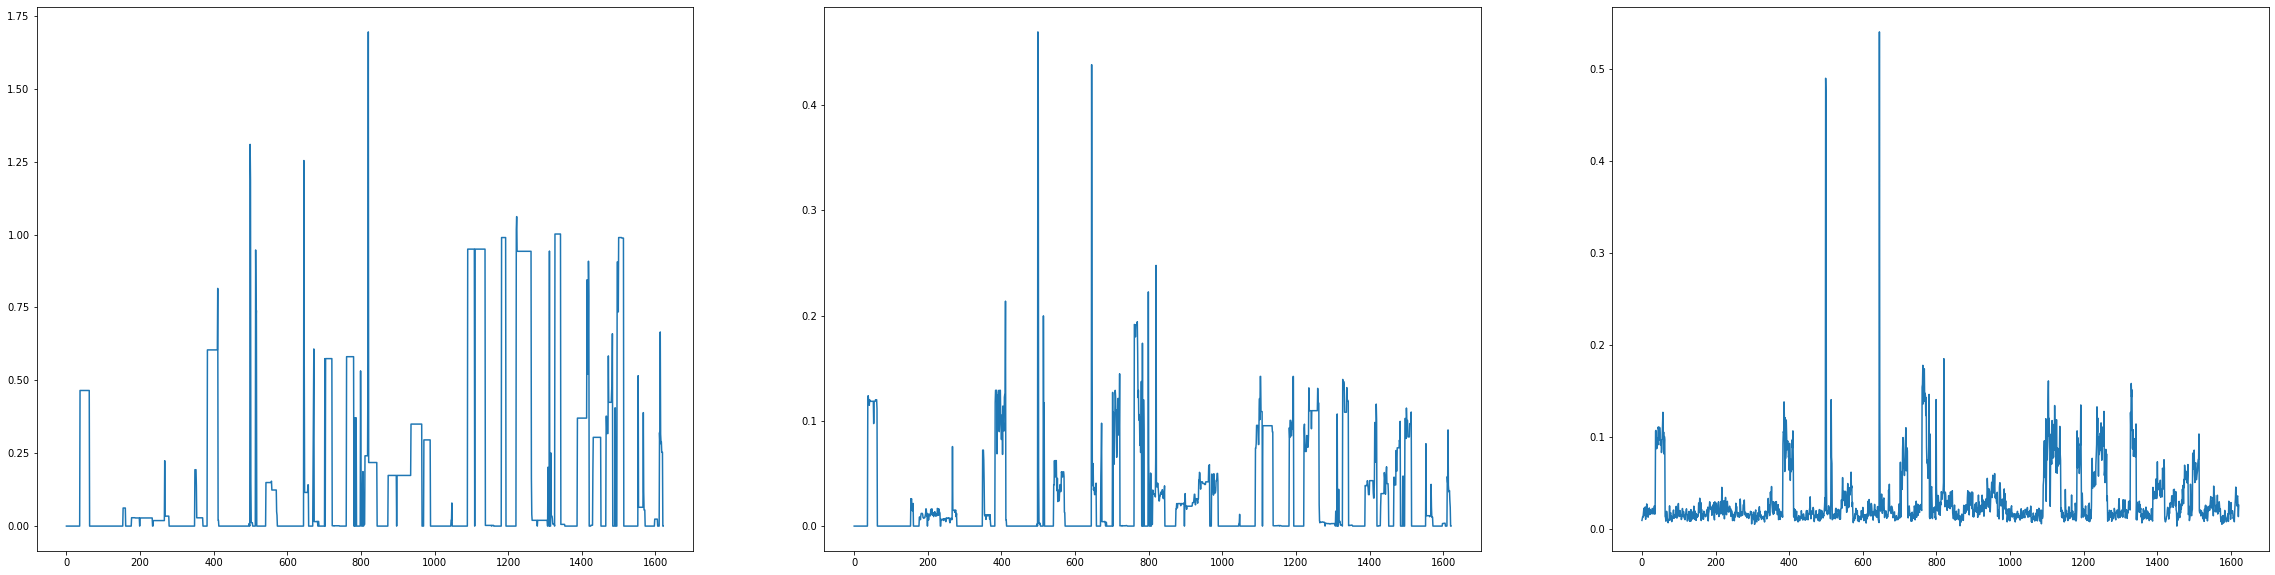

In [87]:
idx = 1234
plt.figure(figsize=(40,10))

plt.subplot(1,3, 1)
sns.lineplot(x=range(input_size),y=np.abs(featmat_t[idx]))

plt.subplot(1,3, 2)
sns.lineplot(x=range(input_size),y=featmat_mms[idx])

decoded = autoencoder_base.predict(featmat_mms[idx].reshape(1,input_size,))
plt.subplot(1,3, 3)
sns.lineplot(x=range(input_size),y=decoded[0])

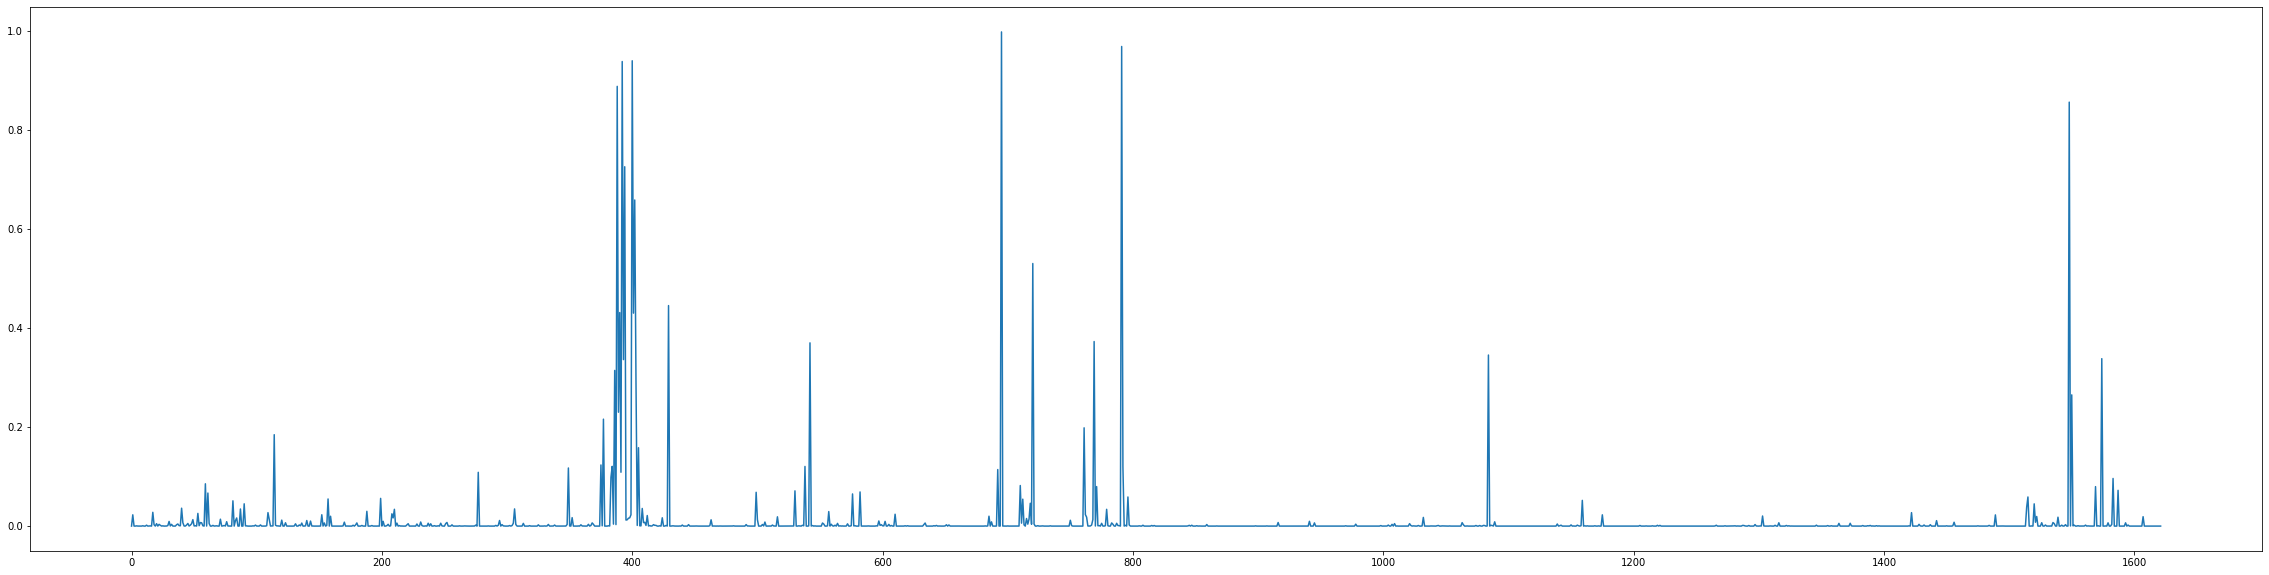

In [32]:
plt.figure(figsize=(20,10))
decoded = autoencoder_base.predict(featmat_t[idx].reshape(1,input_size,))
# plt.subplot(1,3, 3)
sns.lineplot(x=range(input_size),y=decoded[0])

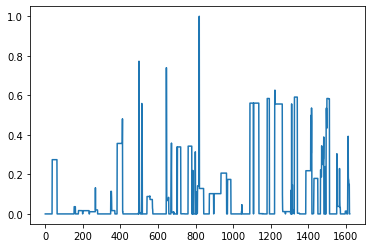

In [63]:
sns.lineplot(x=range(input_size),y=featmat_mas[idx])

In [ ]:
idx = 1234
plt.figure(figsize=(40,10))

pltrows = 1
pltcols =3 

plt.subplot(pltrows,pltcols, 1)
sns.lineplot(x=range(input_size),y=np.abs(feat[idx]))

plt.subplot(pltrows,pltcols, 2)
sns.lineplot(x=range(input_size),y=featmat_mms[idx])

decoded = autoencoder_base.predict(featmat_mms[idx].reshape(1,input_size,))
plt.subplot(pltrows,pltcols, 3)
sns.lineplot(x=range(input_size),y=decoded[0])